# Barcelona - Recommendation On The Basis Of Room Type 

Steps For Finding the solution

- Load Data Set 
- Shape , Description & Information 
- NA Values 
- Distribution, Graph and Insights 
- Correlation Matrix (reviews,overall_satisfaction,accommodates,price & bedrooms) 
- Categorical to Numerical on require column 
- Machine learning Algorithm 
- Recommendation 

import libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load Dataset into Python_notebook

In [170]:
barcelona=pd.read_csv('C:\\Users\\lenovo\\Desktop\\airbnb-dataset-of-barcelona-city\\tomslee_airbnb_barcelona_1477_2017-07-23.csv')

Basic Dataset details

In [171]:
print('Total Rows:' , barcelona.shape[0])
print('Total Columns: ' , barcelona.shape[1])
print('Column Name: ' , barcelona.columns)

Total Rows: 18838
Total Columns:  20
Column Name:  Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name',
       'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')


In [172]:
barcelona.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,12331794,1477,41933599,Shared room,NaN,Barcelona,NaN,Eixample,0,0.0,5,1.0,NaN,211.0,NaN,5-bed mixed dorm at Sleep Green Y.H,2017-07-28 14:49:29.434152,41.387023,2.167047,0101000020E6100000C828CFBC1C56014060E63BF889B1...
1,12331935,1477,41933599,Shared room,NaN,Barcelona,NaN,Eixample,0,0.0,6,1.0,NaN,253.0,NaN,6-bed mixed dorm at Sleep Green Y.H,2017-07-28 14:49:29.431042,41.387658,2.167093,0101000020E6100000CD1FD3DA34560140320400C79EB1...
2,12332051,1477,41933599,Shared room,NaN,Barcelona,NaN,Eixample,0,0.0,8,1.0,NaN,289.0,NaN,8-bed mixed dorm at ACYHostel,2017-07-28 14:49:29.427665,41.387962,2.165981,0101000020E61000001B0FB6D8ED5301409E0B23BDA8B1...
3,4627938,1477,23968212,Shared room,NaN,Barcelona,NaN,Eixample,27,4.5,10,1.0,NaN,264.0,NaN,THE HIPSTEL hostel 1 BED IN DORM-10 Shared WC,2017-07-28 14:49:29.424265,41.391617,2.162516,0101000020E6100000289D4830D54C014060C77F8120B2...
4,12331497,1477,41933599,Shared room,NaN,Barcelona,NaN,Eixample,0,0.0,4,1.0,NaN,169.0,NaN,4-bed mixed dorm at Sleep Green Y.H,2017-07-28 14:49:25.542467,41.386288,2.165477,0101000020E6100000EAEBF99AE55201402B6B9BE271B1...


In [173]:
barcelona['last_modified'].min(),barcelona['last_modified'].max()

('2017-07-23 13:06:57.238229', '2017-07-28 14:49:29.434152')

# Survay Held Between '2017-07-23'  to '2017-07-28'

In [174]:
# Analysis unique values

for i in barcelona.columns:
    print('Column Name: ',i,'Number Of unique value:',len(barcelona[i].unique()))

Column Name:  room_id Number Of unique value: 18838
Column Name:  survey_id Number Of unique value: 1
Column Name:  host_id Number Of unique value: 11155
Column Name:  room_type Number Of unique value: 3
Column Name:  country Number Of unique value: 1
Column Name:  city Number Of unique value: 1
Column Name:  borough Number Of unique value: 1
Column Name:  neighborhood Number Of unique value: 10
Column Name:  reviews Number Of unique value: 280
Column Name:  overall_satisfaction Number Of unique value: 10
Column Name:  accommodates Number Of unique value: 16
Column Name:  bedrooms Number Of unique value: 11
Column Name:  bathrooms Number Of unique value: 1
Column Name:  price Number Of unique value: 477
Column Name:  minstay Number Of unique value: 1
Column Name:  name Number Of unique value: 18288
Column Name:  last_modified Number Of unique value: 18838
Column Name:  latitude Number Of unique value: 15626
Column Name:  longitude Number Of unique value: 16171
Column Name:  location Nu

In [175]:
barcelona['room_type'].value_counts()

Private room       9821
Entire home/apt    8877
Shared room         140
Name: room_type, dtype: int64

Removing unnecessary columns from dataset

Null Value : We can see null value in country ,borough,bathroom and minstay is equal to number of rows (100%) hence Drop the column from Data.  Name There are 47 values are null instead of repalcing with Mode of that perticular column we can remove that rows

In [176]:
barcelona.isnull().sum()

room_id                     0
survey_id                   0
host_id                     0
room_type                   0
country                 18838
city                        0
borough                 18838
neighborhood                0
reviews                     0
overall_satisfaction        0
accommodates                0
bedrooms                    0
bathrooms               18838
price                       0
minstay                 18838
name                       47
last_modified               0
latitude                    0
longitude                   0
location                    0
dtype: int64

In [220]:
barcelona_1=barcelona.drop(['country','borough','bathrooms','minstay','location'],axis=1)

In [221]:
barcelona_1=barcelona_1.dropna(subset=['name'])

In [222]:
barcelona_1.shape

(18791, 15)

In [223]:
barcelona_1.isnull().sum()

room_id                 0
survey_id               0
host_id                 0
room_type               0
city                    0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
name                    0
last_modified           0
latitude                0
longitude               0
dtype: int64

In [202]:
barcelona_1.head(3)

,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude
0,12331794,1477,41933599,Shared room,Barcelona,Eixample,0,0.0,5,1.0,211.0,5-bed mixed dorm at Sleep Green Y.H,2017-07-28 14:49:29.434152,41.387023,2.167047
1,12331935,1477,41933599,Shared room,Barcelona,Eixample,0,0.0,6,1.0,253.0,6-bed mixed dorm at Sleep Green Y.H,2017-07-28 14:49:29.431042,41.387658,2.167093
2,12332051,1477,41933599,Shared room,Barcelona,Eixample,0,0.0,8,1.0,289.0,8-bed mixed dorm at ACYHostel,2017-07-28 14:49:29.427665,41.387962,2.165981


In [203]:
barcelona_1['neighborhood'].unique()

array(['Eixample', 'Sants-Montjuïc', 'Ciutat Vella', 'Sant Martí',
       'Gràcia', 'Nou Barris', 'Les Corts', 'Sarrià-Sant Gervasi',
       'Horta-Guinardó', 'Sant Andreu'], dtype=object)

# ANALYSIS AND INSIGHTS

As we can see Barcelona City There neighborhood 10 places **('Eixample', 'Sants-Montjuïc', 'Ciutat Vella', 'Sant Martí',
       'Gràcia', 'Nou Barris', 'Les Corts', 'Sarrià-Sant Gervasi','Horta-Guinardó', 'Sant Andreu')**, lets find out which is good placed for visit 

.

# 1- Tourist Requirment - As Per Neighborhood,Room Type,Bedroom and Accommodation Capacity

* Maximum Number of Rooms are Private Room
* Below Data shows tourists don't prefer shared room.
* Number Of Entire home/plt is more than the Other Neighborhood except sant Gervasi
* We Observed that private room type is usually used by single or couple and enitre home/apt use by family or group

In [204]:
barcelona_1['room_type'].value_counts()

Private room       9790
Entire home/apt    8861
Shared room         140
Name: room_type, dtype: int64

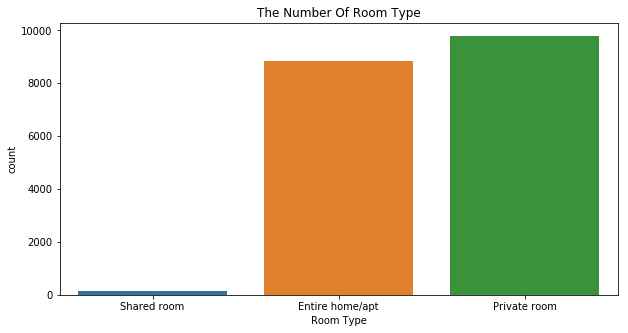

In [205]:
# Count of Room Type 
plt.figure(figsize=(10,5))
sns.countplot(x='room_type',data=barcelona_1)
plt.xlabel('Room Type')
plt.title('The Number Of Room Type')
plt.show()

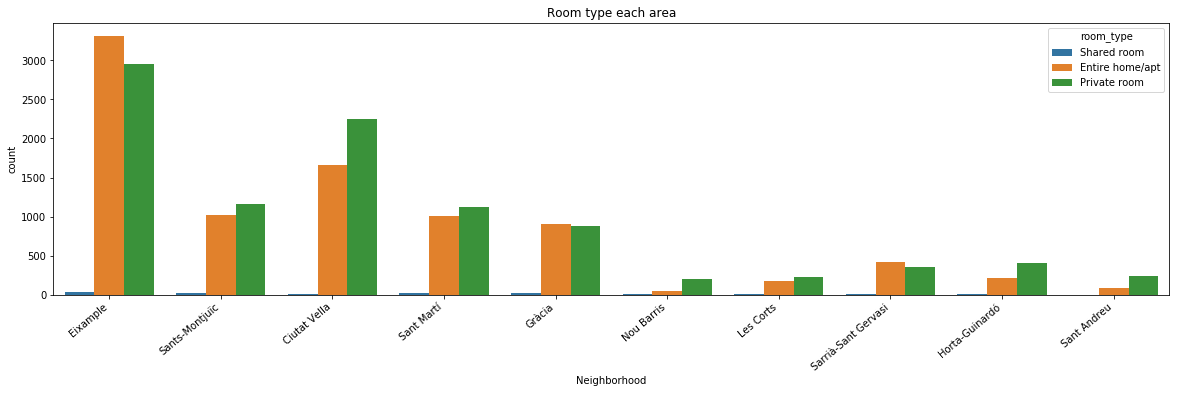

In [206]:
# Room Type Avilable in Neighborhood 
plt.figure(figsize=(20,5))
ax=sns.countplot(x='neighborhood',hue='room_type',data=barcelona_1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Room type each area')
plt.xlabel('Neighborhood')
plt.show()

Text(0.5,1,'Capacity of accommodations')

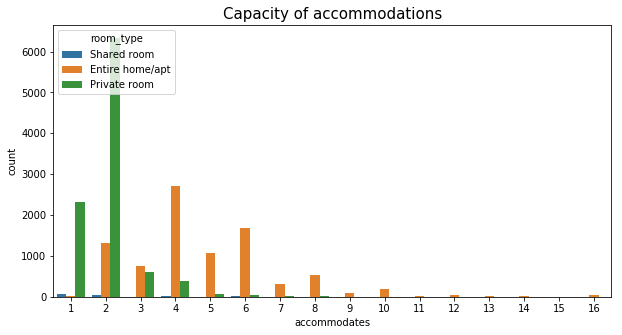

In [207]:
# Capacity of Accommodation with Room Type
plt.figure(figsize=(10,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x='accommodates',hue='room_type',data=barcelona_1)
plt.title('Capacity of accommodations',fontsize=15)

Text(0.5,1,'Capacity of accommodations')

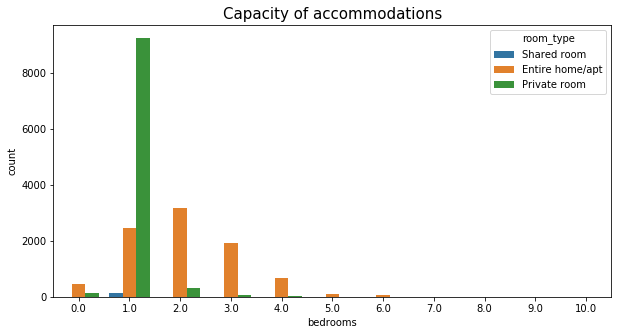

In [208]:
# Number of bedroom with Room Type
plt.figure(figsize=(10,5))
sns.countplot(x='bedrooms',hue='room_type',data=barcelona_1)
plt.title('Capacity of accommodations',fontsize=15)

# As per Survay Held Between '2017-07-23'  to '2017-07-28' Most of Tourist  Prefer Eixample and Ciutat Vella Place in Barcelona

** More than half the tourists prefer an aribnb located in Eixample and Ciutat Vella.

In [209]:
barcelona_1['neighborhood'].value_counts()

Eixample               6303
Ciutat Vella           3919
Sants-Montjuïc         2208
Sant Martí             2157
Gràcia                 1797
Sarrià-Sant Gervasi     771
Horta-Guinardó          643
Les Corts               408
Sant Andreu             328
Nou Barris              257
Name: neighborhood, dtype: int64

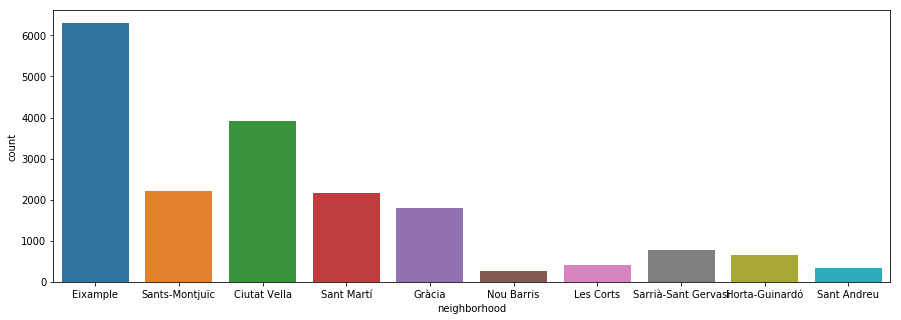

In [210]:
plt.figure(figsize=(15,5))
sns.countplot(x='neighborhood',data=barcelona_1)

# Correlation Matrix 

In [211]:
barcelona_1.corr()

,room_id,survey_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
room_id,1.000000,NaN,0.609646,-0.515790,-0.392929,-0.168094,-0.131125,-0.033072,0.004575,0.009857
survey_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.609646,NaN,1.000000,-0.287537,-0.243979,-0.145240,-0.132117,-0.082251,0.011691,0.020471
reviews,-0.515790,NaN,-0.287537,1.000000,0.429821,0.060882,0.022511,-0.074887,-0.064793,0.020192
overall_satisfaction,-0.392929,NaN,-0.243979,0.429821,1.000000,0.026740,0.013262,-0.106418,-0.032306,0.033464
accommodates,-0.168094,NaN,-0.145240,0.060882,0.026740,1.000000,0.815063,0.582269,-0.015005,0.021843
bedrooms,-0.131125,NaN,-0.132117,0.022511,0.013262,0.815063,1.000000,0.546199,0.026894,0.001385
price,-0.033072,NaN,-0.082251,-0.074887,-0.106418,0.582269,0.546199,1.000000,-0.019084,0.056731
latitude,0.004575,NaN,0.011691,-0.064793,-0.032306,-0.015005,0.026894,-0.019084,1.000000,0.326489
longitude,0.009857,NaN,0.020471,0.020192,0.033464,0.021843,0.001385,0.056731,0.326489,1.000000


* From Above Correlation Matrix we can conclude Review & Overall Satisfaction are slightly correlated 
* accommodates , Bedrooms & Price also playing very important role
* Price also depend on the accommodates & bedrooms 

In [191]:
price_1 = barcelona_1[barcelona_1.room_type == 'Private room']
price_1.groupby(price_1.neighborhood)['price'].mean().sort_values(ascending=False)

neighborhood
Ciutat Vella           62.781681
Sarrià-Sant Gervasi    60.619318
Eixample               57.640244
Gràcia                 52.208238
Sant Martí             50.795031
Sants-Montjuïc         50.160929
Les Corts              49.162162
Horta-Guinardó         45.583942
Sant Andreu            44.863248
Nou Barris             41.526570
Name: price, dtype: float64

In [192]:
price_2 = barcelona_1[barcelona_1.room_type == 'Entire home/apt']
price_2.groupby(price_2.neighborhood)['price'].mean().sort_values(ascending=False)

neighborhood
Sant Martí             205.379447
Eixample               190.308389
Les Corts              187.727778
Sarrià-Sant Gervasi    186.896135
Ciutat Vella           156.211957
Horta-Guinardó         144.657534
Gràcia                 141.934807
Sants-Montjuïc         135.244878
Sant Andreu            126.206522
Nou Barris              98.613636
Name: price, dtype: float64

In [193]:
price_3 = barcelona_1[barcelona_1.room_type == 'Shared room']
price_3.groupby(price_3.neighborhood)['price'].mean().sort_values(ascending=False)

neighborhood
Eixample               86.108108
Sants-Montjuïc         63.476190
Ciutat Vella           52.428571
Sant Martí             45.277778
Les Corts              38.500000
Gràcia                 32.666667
Nou Barris             29.666667
Horta-Guinardó         26.692308
Sant Andreu            24.500000
Sarrià-Sant Gervasi    23.800000
Name: price, dtype: float64

# Categorical Variables to Numerical

In [224]:
room_num = {"room_type":{"Shared room": 0, "Private room": 1,'Entire home/apt': 2}}
barcelona_1.replace(room_num, inplace=True)

In [225]:
barcelona_1['room_type'].value_counts()

1    9790
2    8861
0     140
Name: room_type, dtype: int64

In [230]:
neigh_num={"neighborhood":{'Eixample':0, 'Ciutat Vella':1,'Sants-Montjuïc':2,'Sant Martí':3,
       'Gràcia':4,'Sarrià-Sant Gervasi':5,'Horta-Guinardó':6,'Les Corts':7,'Sant Andreu':8, 'Nou Barris':9}}
barcelona_1.replace(neigh_num, inplace=True)

In [365]:
barcelona_1.head(3)

,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude
0,12331794,1477,41933599,0,Barcelona,0,0,0.0,5,1.0,211.0,5-bed mixed dorm at Sleep Green Y.H,2017-07-28 14:49:29.434152,41.387023,2.167047
1,12331935,1477,41933599,0,Barcelona,0,0,0.0,6,1.0,253.0,6-bed mixed dorm at Sleep Green Y.H,2017-07-28 14:49:29.431042,41.387658,2.167093
2,12332051,1477,41933599,0,Barcelona,0,0,0.0,8,1.0,289.0,8-bed mixed dorm at ACYHostel,2017-07-28 14:49:29.427665,41.387962,2.165981


# ---------------Dataset is now ready to apply ML Algorithms--------------------

In [ ]:
# KNN Algorithm to Predict the neighborhood

In [271]:
top_rated = barcelona_1[barcelona_1.overall_satisfaction >= 3.5]

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [294]:
X=top_rated.drop(['room_id','survey_id','host_id','city','neighborhood','name','last_modified','latitude','longitude'],axis=1)
X_col=X.columns
y=top_rated['neighborhood']

In [295]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X.values)

In [296]:
df_1 = pd.DataFrame(X, columns=X_col)
df_1.head()

,room_type,reviews,overall_satisfaction,accommodates,bedrooms,price
0,-2.874112,-0.225192,-0.216146,2.993365,-0.554617,1.648676
1,-2.874112,-0.543826,-1.592344,3.897508,-0.554617,0.282978
2,-2.874112,-0.589345,-1.592344,3.897508,-0.554617,0.282978
3,-2.874112,-0.634864,1.160051,-0.623209,-0.554617,-0.293650
4,-2.874112,-0.612105,1.160051,-0.623209,-0.554617,-0.374580


In [297]:
# Train & Test Split

In [298]:
X_train, X_test, y_train, y_test = train_test_split(df_1, y,
                                                    train_size=0.8,
                                                    random_state=42)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [299]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9993, 6), (2499, 6), (9993,), (2499,))

In [300]:
# Fit the Model

In [309]:
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')

In [310]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [311]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))        

In [312]:
print_score(knn, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.4943

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.83      0.62      3417
           1       0.52      0.55      0.54      2159
           2       0.44      0.26      0.33      1179
           3       0.46      0.24      0.32      1161
           4       0.47      0.21      0.29       953
           5       0.46      0.11      0.18       343
           6       0.54      0.11      0.18       337
           7       0.40      0.08      0.13       176
           8       0.36      0.05      0.09       155
           9       0.43      0.03      0.05       113

   micro avg       0.49      0.49      0.49      9993
   macro avg       0.46      0.25      0.27      9993
weighted avg       0.48      0.49      0.45      9993


Confusion Matrix: 
 [[2851  307   82   88   58   11   10    4    5    1]
 [ 762 1193   84   59   41    5    6    7    1    1]
 [ 556  201  310   55   40    6    6    3    1    

In [313]:
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.2909

Classification Report: 
               precision    recall  f1-score   support

           0       0.35      0.61      0.45       826
           1       0.27      0.28      0.28       537
           2       0.18      0.11      0.14       313
           3       0.11      0.06      0.08       291
           4       0.12      0.07      0.09       226
           5       0.05      0.01      0.02        87
           6       0.06      0.01      0.02        72
           7       0.14      0.03      0.05        60
           8       0.00      0.00      0.00        46
           9       0.00      0.00      0.00        41

   micro avg       0.29      0.29      0.29      2499
   macro avg       0.13      0.12      0.11      2499
weighted avg       0.23      0.29      0.24      2499


Confusion Matrix: 
 [[507 167  52  47  35  10   4   3   0   1]
 [287 150  35  30  26   1   3   3   2   0]
 [167  69  34  22  16   2   2   1   0   0]
 [167  62  20  17  14   4   

In [314]:
from sklearn.model_selection import GridSearchCV

In [315]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [316]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [317]:
grid_search_cv=GridSearchCV(KNeighborsClassifier(),params,n_jobs=-1,verbose=1)
grid_search_cv = GridSearchCV(KNeighborsClassifier(),
                              params, 
                              n_jobs=-1,
                              verbose=1)

In [318]:
grid_search_cv.fit(X_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [319]:
print_score(grid_search_cv, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.4370



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.82      0.58      3417
           1       0.45      0.49      0.47      2159
           2       0.37      0.19      0.25      1179
           3       0.35      0.14      0.20      1161
           4       0.35      0.12      0.18       953
           5       0.47      0.04      0.08       343
           6       0.45      0.03      0.06       337
           7       0.80      0.02      0.04       176
           8       0.33      0.01      0.01       155
           9       0.00      0.00      0.00       113

   micro avg       0.44      0.44      0.44      9993
   macro avg       0.40      0.19      0.19      9993
weighted avg       0.42      0.44      0.37      9993


Confusion Matrix: 
 [[2785  415   80   78   50    8    1    0    0    0]
 [ 925 1052   73   61   42    4    2    0    0    0]
 [ 636  235  219   48   38    1    1    0    1    0]
 [ 656  219   70  165   42    2    5

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.8s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.7s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.8s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.3s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.1s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.8s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.0s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.2s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.6s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Average Accuracy: 	 0.3397
Accuracy SD: 		 0.0085


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.1s finished


In [320]:
print_score(grid_search_cv, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.3185

Classification Report: 
               precision    recall  f1-score   support

           0       0.36      0.68      0.47       826
           1       0.32      0.34      0.33       537
           2       0.17      0.08      0.11       313
           3       0.15      0.06      0.08       291
           4       0.11      0.04      0.06       226
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        72
           7       0.33      0.02      0.03        60
           8       0.00      0.00      0.00        46
           9       0.00      0.00      0.00        41

   micro avg       0.32      0.32      0.32      2499
   macro avg       0.14      0.12      0.11      2499
weighted avg       0.24      0.32      0.26      2499


Confusion Matrix: 
 [[560 171  39  28  20   4   4   0   0   0]
 [289 184  22  20  20   0   2   0   0   0]
 [187  75  25  14  10   1   0   1   0   0]
 [185  57  22  17   9   0   

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* We are getting very less training and Testing accuracy  in KNN Model
* Training accuracy is higher than Testing means model is overfit
* After Grid Search its not performing well

In [330]:
y_pred=knn.predict(X)

In [331]:
len(y_pred)

12492

# Unsupervised Machine Learning K-Means

In [335]:
from sklearn.cluster import KMeans

In [333]:
X_1=top_rated.drop(['room_id','survey_id','host_id','city','name','last_modified','latitude','longitude'],axis=1)
X_1.columns

Index(['room_type', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'price'],
      dtype='object')

Text(0,0.5,'Sum of squared distance')

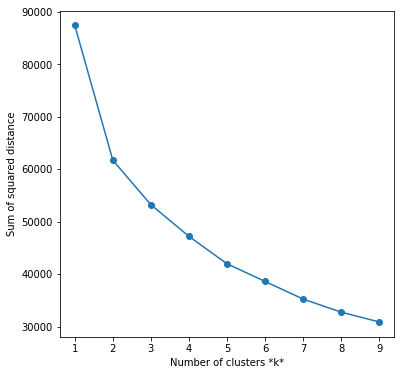

In [354]:
# Best K Value by Elbow Plot
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_1)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [334]:
X_1=StandardScaler().fit_transform(X_1.values)

In [379]:
kmeans=KMeans(n_clusters=3,random_state=0).fit(X_1)
top_rated['new_cluster']=kmeans.labels_

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [383]:
cluster_0=top_rated[top_rated.new_cluster==0]

In [389]:
cluster_0['room_type'].value_counts()

2    4116
1       3
Name: room_type, dtype: int64

# 1- in this cluster Tourist will get Recommendation  Entire home /apt and some of private room 
* "Shared room": 0, "Private room": 1,'Entire home/apt': 2
* 'Eixample':0, 'Ciutat Vella':1,'Sants-Montjuïc':2,'Sant Martí':3,'Gràcia':4,'Sarrià-Sant Gervasi':5,'Horta-uinardó':6  'Les Corts':7,'Sant Andreu':8, 'Nou Barris':9


In [385]:
cluster_0.head(100)

,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude,new_cluster
152,1119129,1477,6141122,2,Barcelona,1,29,4.5,5,2.0,104.0,City center Ramblas..cheap comfort,2017-07-28 13:50:28.500672,41.380380,2.172911,0
157,293273,1477,541462,2,Barcelona,6,14,4.5,4,2.0,163.0,Apartment- UAB Entire home/apt,2017-07-28 13:41:10.141909,41.418284,2.177153,0
158,13119250,1477,16707403,2,Barcelona,0,5,4.0,6,2.0,48.0,Flat in Sant Antoni,2017-07-28 13:34:31.566480,41.376856,2.160617,0
172,18012071,1477,2897457,2,Barcelona,0,5,5.0,4,2.0,302.0,"100m2 Designer Loft with a terrace, very central",2017-07-28 12:30:19.387263,41.386950,2.159367,0
185,5244849,1477,5700985,2,Barcelona,0,44,4.5,4,2.0,239.0,Lovely apartment in BCN's heart,2017-07-28 12:29:43.652232,41.388445,2.171238,0
190,17695466,1477,29750554,2,Barcelona,1,7,4.5,4,2.0,204.0,Ramblas- City Center,2017-07-28 12:24:48.419861,41.383348,2.169583,0
195,19161866,1477,124450253,2,Barcelona,1,6,4.5,8,0.0,205.0,Superbe appartement centre Barcelone,2017-07-28 12:22:57.337896,41.383129,2.179615,0
204,9875167,1477,229209,2,Barcelona,1,39,4.5,4,2.0,176.0,Great apartment next to Rambla,2017-07-28 12:09:31.447743,41.381386,2.172366,0
208,17953620,1477,61041948,2,Barcelona,2,10,5.0,4,1.0,157.0,Comfortable Modern House in Barcelona,2017-07-28 12:02:39.412280,41.379395,2.138738,0
209,17307109,1477,113344862,2,Barcelona,0,6,5.0,5,2.0,178.0,Lovely Apartment in BCN Center (11) HUTB-008430,2017-07-28 12:02:35.637190,41.383329,2.162553,0


# 2 - in this cluster Tourist will get Recommendation Private Room and some of Shared Room
* "Shared room": 0, "Private room": 1,'Entire home/apt': 2
* 'Eixample':0, 'Ciutat Vella':1,'Sants-Montjuïc':2,'Sant Martí':3,'Gràcia':4,'Sarrià-Sant Gervasi':5,'Horta-uinardó':6 'Les Corts':7,'Sant Andreu':8, 'Nou Barris':9

In [398]:
cluster_1=top_rated[top_rated.new_cluster==1]
cluster_1['room_type'].value_counts()

1    6437
0      76
Name: room_type, dtype: int64

In [399]:
cluster_1.head(4)

,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude,new_cluster
3,4627938,1477,23968212,0,Barcelona,0,27,4.5,10,1.0,264.0,THE HIPSTEL hostel 1 BED IN DORM-10 Shared WC,2017-07-28 14:49:29.424265,41.391617,2.162516,1
5,12018424,1477,64212374,0,Barcelona,2,13,4.0,12,1.0,129.0,12 Bed Mixed Dorm Ensuite,2017-07-28 14:49:23.585708,41.373268,2.170138,1
6,12017913,1477,64212374,0,Barcelona,2,11,4.0,12,1.0,129.0,12 Bed Mixed Dorm Ensuite,2017-07-28 14:49:23.579837,41.372360,2.169215,1
7,11830051,1477,41807465,0,Barcelona,0,9,5.0,2,1.0,72.0,HEART OF BARCELONA : BED IN MIXED DORMITORY 2 ...,2017-07-28 14:49:17.169946,41.391836,2.154014,1


# 3 - in this cluster Tourist will get Recommendation Entire home/apt,Private room and Shared Room
* "Shared room": 0, "Private room": 1,'Entire home/apt': 2
* 'Eixample':0, 'Ciutat Vella':1,'Sants-Montjuïc':2,'Sant Martí':3,'Gràcia':4,'Sarrià-Sant Gervasi':5,'Horta-uinardó':6 'Les Corts':7,'Sant Andreu':8, 'Nou Barris':9

In [400]:
cluster_2=top_rated[top_rated.new_cluster==2]
cluster_2['room_type'].value_counts()

2    1833
1      25
0       2
Name: room_type, dtype: int64

In [401]:
cluster_2.head(4)

,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude,new_cluster
10,1823947,1477,9547606,0,Barcelona,2,67,4.0,16,1.0,45.0,Hostal esta 150 m del Camp Nou wifi,2017-07-28 14:49:12.852812,41.378011,2.129361,2
31,12284317,1477,64212374,0,Barcelona,2,17,3.5,16,1.0,66.0,20 Bed Mixed Basic Dorm Ensuite,2017-07-28 14:48:57.636807,41.373472,2.170715,2
146,2453031,1477,3678711,2,Barcelona,4,16,4.5,10,4.0,138.0,CENTRIC APARTMENT with FREE WIFI,2017-07-28 14:40:39.329737,41.410408,2.146691,2
154,728480,1477,2201772,2,Barcelona,0,13,4.5,9,4.0,543.0,Cosy Apartment Hospital Clinic,2017-07-28 13:49:47.939803,41.388688,2.151436,2
